# COVID-19, normal (healthy), and pneumonia classification using Deep Learning Models

## InceptionV3 with image size 256x256, categorical cross-entropy loss function and 16 batch size, trained over 1000 epochs to obtain the best model

## Import the necessary libraries: 

In [1]:
from datetime import datetime
dt=datetime.now().strftime("%d_%b_%Y--%I_%M_%S_%p")
print(dt)

25_Nov_2021--02_30_38_AM


In [2]:
# import the necessary packages
import os
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow import keras
import matplotlib.pyplot as plt
#from tensorflow import keras
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers, models, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Input, Reshape, Concatenate, GlobalAveragePooling2D, BatchNormalization, Dropout, Activation, GlobalMaxPooling2D
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications.densenet import DenseNet121
#from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
#from keras.utils.vis_utils import pydot
import re
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn


In [3]:
base_dir = ''

In [4]:
base_dir

''

In [5]:
train_dir = os.path.join(base_dir, 'newtrain') # change here newtrain to train
validation_dir = os.path.join(base_dir, 'validation')

train_COVID_dir = os.path.join(train_dir, 'covid')
train_NORMAL_dir = os.path.join(train_dir, 'normal')
train_PNEUMONIA_dir = os.path.join(train_dir, 'pneumonia')

validation_COVID_dir = os.path.join(validation_dir, 'covid')
validation_NORMAL_dir = os.path.join(validation_dir, 'normal')
validation_PNEUMONIA_dir = os.path.join(validation_dir, 'pneumonia')

In [6]:
print(train_COVID_dir)
print(train_NORMAL_dir)
print(train_PNEUMONIA_dir)
print()
print(validation_COVID_dir)
print(validation_NORMAL_dir)
print(validation_PNEUMONIA_dir)


newtrain\covid
newtrain\normal
newtrain\pneumonia

validation\covid
validation\normal
validation\pneumonia


In [7]:
train_COVID_fnames = os.listdir( train_COVID_dir )
train_NORMAL_fnames = os.listdir( train_NORMAL_dir )
train_PNEUMONIA_fnames = os.listdir( train_PNEUMONIA_dir )

print(train_COVID_fnames[:10])
print()
print(train_NORMAL_fnames[:10])
print()
print(train_PNEUMONIA_fnames[:10])

print('total training COVID images :', len(os.listdir(      train_COVID_dir ) ))
print('total training NORMAL images :', len(os.listdir(      train_NORMAL_dir ) ))
print('total training PNEUMONIA images :', len(os.listdir(      train_PNEUMONIA_dir ) ))

print('total validation COVID images :', len(os.listdir( validation_COVID_dir ) ))
print('total validation NORMAL images :', len(os.listdir( validation_NORMAL_dir ) ))
print('total validation PNEUMONIA images :', len(os.listdir( validation_PNEUMONIA_dir ) ))

['cov_1110.jpg', 'cov_1111.jpg', 'cov_11110.jpg', 'cov_11111.jpg', 'cov_11112.jpg', 'cov_11113.jpg', 'cov_11114.jpg', 'cov_11115.jpg', 'cov_11116.jpg', 'cov_11117.jpg']

['normal-0000.jpg', 'normal-0001.jpg', 'normal-00010.jpg', 'normal-00011.jpg', 'normal-00012.jpg', 'normal-00013.jpg', 'normal-00014.jpg', 'normal-00015.jpg', 'normal-00016.jpg', 'normal-00017.jpg']

['pneumonia0000.jpg', 'pneumonia0001.jpg', 'pneumonia00010.jpg', 'pneumonia00011.jpg', 'pneumonia00012.jpg', 'pneumonia00013.jpg', 'pneumonia00014.jpg', 'pneumonia00015.jpg', 'pneumonia00016.jpg', 'pneumonia00017.jpg']
total training COVID images : 33
total training NORMAL images : 37
total training PNEUMONIA images : 22
total validation COVID images : 1432
total validation NORMAL images : 1000
total validation PNEUMONIA images : 1000


### Experimental parameters 

In [8]:
# set learning rate, epochs and batch size
INIT_LR = 1e-5    # This value is specific to what model is chosen: Inception, VGG or ResNet etc.
EPOCHS = 2 # changed to 1000
BS = 16
imagesize=256

## Load the sample image files provided here 

give the path totraining dataset in this variable
imagePath = "./train/"  # change to your local path for the sample images

In [9]:
print("Loading images...")
imagePath = "./newtrain/"  # change to your local path for the sample images
#imagePath = "./train/"  # change to your local path for the sample images
imagePaths = list(paths.list_images(imagePath))
#print('point a')
f = open("filesize.txt", "w")
data = []
labels = []

count = 1
filesize=[]
# read all X-Rays in the specified path, and resize them all to 256x256
for imagePath in imagePaths:
    #print(count)
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, channels = image.shape
    #print (label,' ',height,' ', width,' ', channels)
    #f.write(label,' ',height,' ', width,' ', channels)
    filesize.append([label,height,width,channels,height*width*channels])
    image = cv2.resize(image, (imagesize, imagesize))
    data.append(image)
    labels.append(label)
    count=count+1
#print('point b')    
#normalise pixel values to real numbers between 0.0 - 1.0
data = np.array(data) / 255.0
labels = np.array(labels)
#print('point c')
# perform one-hot encoding for a multi-class labeling
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
labels = to_categorical(integer_encoded)
#print('point d')
print("... ... ", len(data), "images loaded in multiple classes:")
print(label_encoder.classes_)
#print('point e')
f.close()

Loading images...
... ...  92 images loaded in multiple classes:
['./newtrain/covid' './newtrain/normal' './newtrain/pneumonia']


calculating the image size in training dataset and saving in a training_image_size.csv file

In [10]:
df=pd.DataFrame(filesize,columns=["label","height","width","channels","size"])
df

,label,height,width,channels,size
0,./newtrain/covid,512,512,3,786432
1,./newtrain/covid,1024,1024,3,3145728
2,./newtrain/covid,512,512,3,786432
3,./newtrain/covid,2539,3050,3,23231850
4,./newtrain/covid,1330,1796,3,7166040
...,...,...,...,...,...
87,./newtrain/pneumonia,1024,1024,3,3145728
88,./newtrain/pneumonia,1024,1024,3,3145728
89,./newtrain/pneumonia,1024,1024,3,3145728
90,./newtrain/pneumonia,1024,1024,3,3145728


In [11]:
df.value_counts()

label                 height  width  channels  size    
./newtrain/normal     1024    1024   3         3145728     37
./newtrain/pneumonia  1024    1024   3         3145728     22
./newtrain/covid      512     512    3         786432       8
                      1024    1024   3         3145728      7
                      2000    2000   3         12000000     3
                      554     561    3         932382       1
                      597     737    3         1319967      1
                      610     586    3         1072380      1
                      695     849    3         1770165      1
                      734     895    3         1970790      1
                      992     1024   3         3047424      1
                      366     446    3         489708       1
                      1282    1210   3         4653660      1
                      1330    1796   3         7166040      1
                      1711    2038   3         10461054     1
              

In [12]:
pd.DataFrame(df.value_counts()).to_csv('training_image_size.csv')

In [13]:
import csv
with open('training_image_size.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['label', 'height', 'width', 'channels', 'size', '0']
['./newtrain/normal', '1024', '1024', '3', '3145728', '37']
['./newtrain/pneumonia', '1024', '1024', '3', '3145728', '22']
['./newtrain/covid', '512', '512', '3', '786432', '8']
['./newtrain/covid', '1024', '1024', '3', '3145728', '7']
['./newtrain/covid', '2000', '2000', '3', '12000000', '3']
['./newtrain/covid', '554', '561', '3', '932382', '1']
['./newtrain/covid', '597', '737', '3', '1319967', '1']
['./newtrain/covid', '610', '586', '3', '1072380', '1']
['./newtrain/covid', '695', '849', '3', '1770165', '1']
['./newtrain/covid', '734', '895', '3', '1970790', '1']
['./newtrain/covid', '992', '1024', '3', '3047424', '1']
['./newtrain/covid', '366', '446', '3', '489708', '1']
['./newtrain/covid', '1282', '1210', '3', '4653660', '1']
['./newtrain/covid', '1330', '1796', '3', '7166040', '1']
['./newtrain/covid', '1711', '2038', '3', '10461054', '1']
['./newtrain/covid', '1828', '2200', '3', '12064800', '1']
['./newtrain/covid', '1971

In [14]:
pd.DataFrame(df.value_counts()).head(20)

0
label                height width channels size        
./newtrain/normal    1024   1024  3        3145728   37
./newtrain/pneumonia 1024   1024  3        3145728   22
./newtrain/covid     512    512   3        786432     8
                     1024   1024  3        3145728    7
                     2000   2000  3        12000000   3
                     554    561   3        932382     1
                     597    737   3        1319967    1
                     610    586   3        1072380    1
                     695    849   3        1770165    1
                     734    895   3        1970790    1
                     992    1024  3        3047424    1
                     366    446   3        489708     1
                     1282   1210  3        4653660    1
                     1330   1796  3        7166040    1
                     1711   2038  3        10461054   1
                     1828   2200  3        12064800   1
                     1971   2498  3        14770674   1
                     2539   3050  3        23231850   1
                     462    497   3        688842     1
                     277    375   3        311625     1

In [15]:
classes_of_data=label_encoder.classes_

print(classes_of_data)
print()
print(classes_of_data.shape)
print()
print(type(classes_of_data))
print(type(classes_of_data[0]))

['./newtrain/covid' './newtrain/normal' './newtrain/pneumonia']

(3,)

<class 'numpy.ndarray'>
<class 'numpy.str_'>


In [16]:
c1=[]
c2=[]
for i in range(len(classes_of_data)):
    print(classes_of_data[i])
    c1.append(classes_of_data[i])
    c2.append(re.sub(r'^./newtrain/','',classes_of_data[i]))

print(c1)
print(c2)

./newtrain/covid
./newtrain/normal
./newtrain/pneumonia
['./newtrain/covid', './newtrain/normal', './newtrain/pneumonia']
['covid', 'normal', 'pneumonia']


In [17]:
len(classes_of_data)

3

In [18]:
print(type(c2))
print(type(c2[0]))

<class 'list'>
<class 'str'>


In [19]:
for i in (classes_of_data):
    print(i,re.sub(r'^./newtrain/','',i))
   

./newtrain/covid covid
./newtrain/normal normal
./newtrain/pneumonia pneumonia


In [20]:
print(data.shape)

(92, 256, 256, 3)


In [21]:
#print(imagePath)
#print((imagePaths))


## Loading sample image

Loading sample image from training data set: the first image from covid, normal (healthy), and pneumonia class are loaded as a sample image, which is used in the research paper.

In [22]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import cv2
cov = image.imread('./newtrain/covid\\cov_1110.jpg')
nor = image.imread('./newtrain/normal\\normal-0000.jpg')
pne = image.imread('./newtrain/pneumonia\\pneumonia0000.jpg')

In [23]:
# summarize shape of the pixel array
print(cov.dtype)
print(cov.shape)
print()
print(nor.dtype)
print(nor.shape)
print()
print(pne.dtype)
print(pne.shape)

uint8
(512, 512, 3)

uint8
(1024, 1024)

uint8
(1024, 1024)


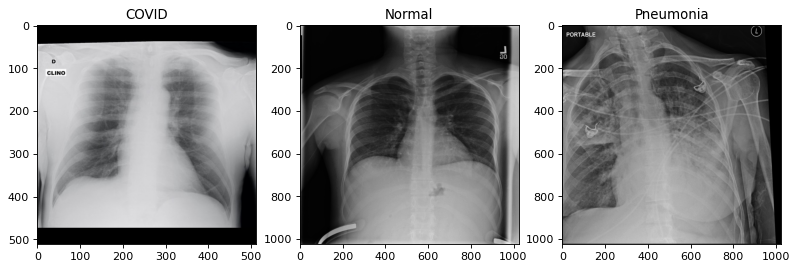

In [24]:
from matplotlib.pyplot import figure

figure(figsize=(12, 10), dpi=80)
# plot all three images using matplotlib
pyplot.subplot(131)
pyplot.imshow(cov,cmap='gray')
plt.title("COVID")
pyplot.subplot(132)
pyplot.imshow(nor,cmap='gray')
plt.title("Normal")
pyplot.subplot(133)
pyplot.imshow(pne,cmap='gray')
plt.title("Pneumonia")

plt.savefig( '{}_Sample_Images.png'.format(dt))
plt.savefig("sample_images.pdf")
pyplot.show()

In [25]:
list_of_classes=list(label_encoder.classes_)
#print(label_encoder.transform(list_of_classes))
for i ,j in zip(list_of_classes,label_encoder.transform(list_of_classes)):
    print('{:20}'.format(i),'{:.>5}'.format(j))

./newtrain/covid     ....0
./newtrain/normal    ....1
./newtrain/pneumonia ....2


In [26]:
print(len(list_of_classes))

3


In [27]:
for i ,j, k in zip(list_of_classes,label_encoder.transform(list_of_classes),c2):
    print('{:20}'.format(i),'{:.>12}'.format(k),'{:.>5}'.format(j))

./newtrain/covid     .......covid ....0
./newtrain/normal    ......normal ....1
./newtrain/pneumonia ...pneumonia ....2


In [28]:
print(labels.shape)
print(labels)

(92, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 

In [29]:
print(' size of data: ',data.size, '\n No of rows: ',len(data),'\n No of labels: ',len(labels),'\n Type: ',type(data),'\n','rows: ',len(data),'\n','columns: ',len(data[0]),'\n','total_length: ',len(data)*len(data[0]))

 size of data:  18087936 
 No of rows:  92 
 No of labels:  92 
 Type:  <class 'numpy.ndarray'> 
 rows:  92 
 columns:  256 
 total_length:  23552


In [30]:
print(len(data),len(data[0]),len(data[0][0]),len(data[0][0][0]))

92 256 256 3


In [35]:
# data

## Training Model: Add in basic data augment, re-compose the model, then train it  

In [37]:
#baseModel3 = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(imagesize, imagesize, 3)))
baseModel3 = InceptionV3(weights="imagenet", include_top=False, input_tensor=Input(shape=(imagesize, imagesize, 3)))
#baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(imagesize, imagesize, 3)))
#baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(imagesize, imagesize, 3)))
#baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(256, 256, 3)))
#baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(256, 256, 3)))

# split the data between train and validation.
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

print("trainX:",trainX.shape[0])
print("testX:",testX.shape[0])
print("trainY:",trainY.shape[0])
print("testY:",testY.shape[0])

# add on a simple Augmentation. Note: too many Augumentation doesn't actually help in this case - I found during the test. 
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")


#baseModel3 = DenseNet121(weights="imagenet", include_top=False, input_tensor=Input(shape=(imagesize, imagesize, 3)))
#Add on a couple of custom CNN layers on top of the Inception V3 model. 
headModel3 = baseModel3.output
#tf.keras.layers.
#headModel3 = GlobalAveragePooling2D()(headModel3)
headModel3 = AveragePooling2D(pool_size=(4, 4))(headModel3)
headModel3 = Flatten(name="flatten")(headModel3)
headModel3 = Dense(64, activation="relu")(headModel3)
headModel3 = Dropout(0.5)(headModel3)
headModel3 = Dense(3, activation="softmax")(headModel3) # as we have 3 classes: covid, normal and pneumonia 

# Compose the final model
model = Model(inputs=baseModel3.input, 
              outputs=headModel3)

# Unfreeze pre-trained Inception "ImageNet" weights for re-training since I got a Navidia T4 GPU to play with anyway
#for layer in baseModel.layers:
#    layer.trainable = False

print("Compiling model...")

opt = Adam(lr=INIT_LR, 
           decay=INIT_LR / EPOCHS)

model.compile(loss="categorical_crossentropy", 
              optimizer=opt, 
              metrics=["accuracy"])

# pip3 install pydot-ng
# pip3 install graphviz
#
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# simple early stopping
# We can update the example and add very simple early stopping.
# As soon as the loss of the model begins to increase on the test dataset, we will stop training.
# monitor: allows you to specify the performance measure to monitor in order to end training.
# mode: we would seek a maximum for validation accuracy.
# verbose = 1: Once stopped, the callback will print the epoch number.
# min_delta: for 0.5% for accuracy. 
# baseline: 
#es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, min_delta=0.5)#, baseline=0.4)
#from tensorflow.keras.callbacks import ReduceLROnPlateau

es = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy', # monitor: quantity to be monitored.
        factor=0.001, # factor: factor by which the learning rate will be reduced. new_lr = lr * factor.
        patience=30, # patience: number of epochs with no improvement after which learning rate will be reduced.
        mode='auto', # mode: one of {'auto', 'min', 'max'}  in 'auto' mode, the direction is automatically inferred 
        #                                                                   from the name of the monitored quantity.
        min_delta=0.05, # min_delta: threshold for measuring the new optimum, to only focus on significant changes; 
        cooldown=5, # cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.
        min_lr=INIT_LR, # min_lr: lower bound on the learning rate.
        verbose=1, # displays epoch number
    )

mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', 
                                        monitor='val_accuracy', 
                                        mode='max', 
                                        verbose=1, 
                                        save_best_only=True)

# We can improve the trigger for early stopping by waiting a while before stopping.
# patient early stopping: In this case, we will wait 200 epochs before training is stopped. 
#          Specifically, this means that we will allow training to continue for up to an additional 5 epochs 
#          after the point that validation loss started to degrade, giving the training process an opportunity 
#          to get across flat spots or find some additional improvement.
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# train the full model, since we unfroze the pre-trained weights above
print("Training the full stack model...")
H = model.fit( trainAug.flow(trainX, trainY, batch_size=BS), 
                        steps_per_epoch=len(trainX) // (BS),
                        validation_data=(testX, testY), 
                        validation_steps=len(testX) // (BS), 
                        epochs=EPOCHS,
                        callbacks=[es,mc]                        
                       )



trainX: 73
testX: 19
trainY: 73
testY: 19
Compiling model...
Training the full stack model...
Epoch 1/2
4/4 [==============================] - 112s 21s/step - loss: 1.2260 - accuracy: 0.4033 - val_loss: 1.2964 - val_accuracy: 0.2632

Epoch 00001: val_accuracy improved from -inf to 0.26316, saving model to best_model.h5
Epoch 2/2
4/4 [==============================] - 83s 21s/step - loss: 1.3526 - accuracy: 0.2516 - val_loss: 1.2812 - val_accuracy: 0.3158

Epoch 00002: val_accuracy improved from 0.26316 to 0.31579, saving model to best_model.h5


In [38]:
# load the saved model
saved_model = tf.keras.models.load_model('best_model.h5')
saved_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

mixed9 (Concatenate)            (None, 6, 6, 2048)   0           activation_76[0][0]              
                                                                 mixed9_0[0][0]                   
                                                                 concatenate[0][0]                
                                                                 activation_84[0][0]              
__________________________________________________________________________________________________
conv2d_89 (Conv2D)              (None, 6, 6, 448)    917504      mixed9[0][0]                     
__________________________________________________________________________________________________
batch_normalization_89 (BatchNo (None, 6, 6, 448)    1344        conv2d_89[0][0]                  
__________________________________________________________________________________________________
activation_89 (Activation)      (None, 6, 6, 448)    0           batch_normalization_89[0][0]     
__________

evaluate the model

In [39]:
#trainX, testX, trainY, testY
# evaluate the model
_,train_acc = saved_model.evaluate(trainX, trainY, verbose=0)
_,test_acc = saved_model.evaluate(testX, testY, verbose=0)
print('Train: ',train_acc,', Test: ' ,  test_acc)

Train:  0.3287671208381653 , Test:  0.31578946113586426


In [40]:
history_dict = H.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


plot of training model

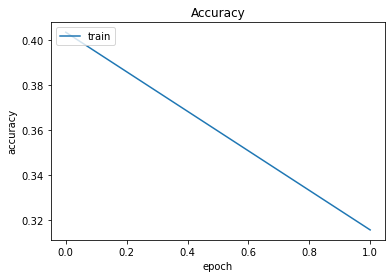

In [41]:
import matplotlib.pyplot as plt
H.history.keys()
plt.plot(H.history['accuracy'])
#plt.plot(H.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

plt.savefig( '{}_{}_epochs_{}_BS_{}_Accuracy_plot.png'.format(os.path.dirname(imagePaths[0]).split('/')[1],EPOCHS,BS,dt))
plt.show()

In [42]:
# shows epoches value
len(H.history['val_accuracy']) 

2

## Plot confusion matrix for the TRAINING DATA results:

In [43]:
print("Evaluating the trained model ...")
predIdxs = saved_model.predict(testX, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(testY.argmax(axis=1), predIdxs, target_names=label_encoder.classes_))

# calculate a basic confusion matrix
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
print('total: ',total)
acc = (cm[0, 0] + cm[1, 1] + cm[2, 2]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1] + cm[0, 2])
specificity = (cm[1, 1] + cm[1, 2] + cm[2, 1] + cm[2, 2]) / (cm[1, 0] + cm[1, 1] + cm[1, 2] + cm[2, 0] + cm[2, 1] + cm[2, 2])

# show the confusion matrix, accuracy, sensitivity, and specificity
print('confusion matrix: \n',cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

Evaluating the trained model ...


d:\installed_program\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                      precision    recall  f1-score   support

    ./newtrain/covid       0.00      0.00      0.00         7
   ./newtrain/normal       0.42      0.62      0.50         8
./newtrain/pneumonia       0.14      0.25      0.18         4

            accuracy                           0.32        19
           macro avg       0.19      0.29      0.23        19
        weighted avg       0.21      0.32      0.25        19

total:  19
confusion matrix: 
 [[0 4 3]
 [0 5 3]
 [0 3 1]]
acc: 0.3158
sensitivity: 0.0000
specificity: 1.0000


In [44]:
#prediction_decoded = label_encoder.inverse_transform(predClasses)
for i ,j, k, l in zip(list_of_classes,label_encoder.transform(list_of_classes),c2,label_encoder.classes_):
    print('{:20}'.format(i),'{:.>12}'.format(k),'{:.>5}'.format(j),'{:.>5}'.format(l))

./newtrain/covid     .......covid ....0 ./newtrain/covid
./newtrain/normal    ......normal ....1 ./newtrain/normal
./newtrain/pneumonia ...pneumonia ....2 ./newtrain/pneumonia


[Text(0.5, 1.0, 'Test Dataset (17,958 CXR images) Confusion Matrix')]

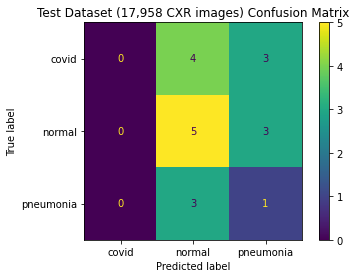

In [45]:
# confusion matrix using sklearn
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=c2)
disp.plot()
disp.ax_.set(
                title='Test Dataset (17,958 CXR images) Confusion Matrix')#, 

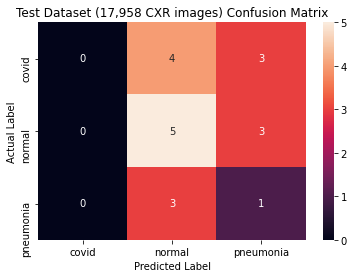

In [46]:
# confusion matrix using seaborn 
## The Seaborn Library provides data visualization. In this example, it plots
## the Confusion Matrix
import seaborn as sns
## Call the heatmap() function from the Seaborn Library.
## annot=True annotates cells.
## fmt='g' disables scientific notation.
## The heatmap() function returns a Matplotlib Axes Object.
ax = sns.heatmap(cm, annot=True, fmt='g');
## Modify the Axes Object directly to set various attributes such as the
## Title, X/Y Labels.
ax.set_title('Test Dataset (17,958 CXR images) Confusion Matrix');
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label');
## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(c2)
ax.yaxis.set_ticklabels(c2)
## Finally call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

### Training and validation accuracy 

In [47]:
def plot_training(history,EPOCHS,BS,dt):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  #plt.savefig("./customDenseNet121_plot00a.png")
  plt.savefig( '{}_{}_epochs_{}_BS_{}_Training&validation accuracyplot.png'.format(os.path.dirname(imagePaths[0]).split('/')[1],EPOCHS,BS,dt))
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  #plt.savefig("./customDenseNet121_plot00b.png")
  plt.savefig( '{}_{}_epochs_{}_BS_{}_Training&validationLossplot.png'.format(os.path.dirname(imagePaths[0]).split('/')[1],EPOCHS,BS,dt))
  plt.show()

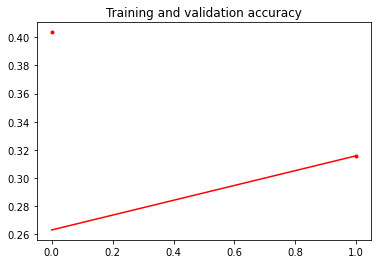

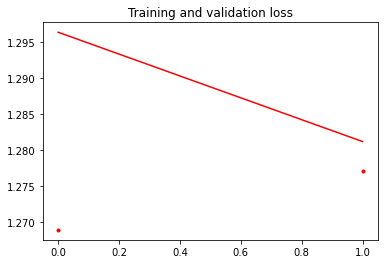

In [48]:
plot_training(H,EPOCHS,BS,dt)

## Plot confusion matrix for testing some real X-rays 

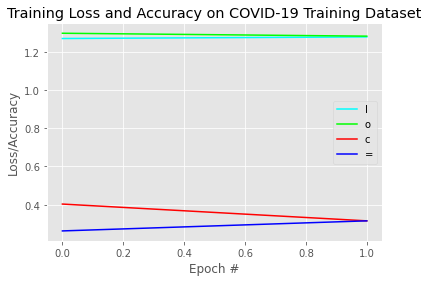

In [49]:

# plot the training loss and accuracy
N = EPOCHS 
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss",c ='aqua')
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss",c ='lime')
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_accuracy",c ='red')
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_accuracy",c ='b')
plt.title("Training Loss and Accuracy on COVID-19 Training Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
#plt.legend(bbox_to_anchor =(1.2, 1.25), ncol =4 )
#plt.savefig("./customDenseNet121_plot01.png")
#plt.legend(loc="lower left")
plt.legend('loc=best')
plt.savefig( '{}_{}_epochs_{}_BS_{}_plot.png'.format(os.path.dirname(imagePaths[0]).split('/')[1],EPOCHS,BS,dt))

# Validation Data

In [50]:
...
imagePathValidation = "./validation_2/"
#imagePathValidation = "./validation/"
...

Ellipsis

In [51]:
print(imagePathValidation)

./validation_2/


In [52]:
print("[INFO] loading untrained test images...")
#imagePathTest = "./validation"
imagePathsValidation = list(paths.list_images(imagePathValidation))
print(len(imagePathsValidation))

[INFO] loading untrained test images...
33


In [53]:
dataValidation = []
labelsValidation = []

counter2 = 1
filesize_v=[]
# loop over the image paths
for imagePathValidation in imagePathsValidation:
    #print(counter2)
    # extract the class label from the filename
    labelValidation = imagePathValidation.split(os.path.sep)[-2]
  
	# load the image, swap color channels, and resize it to be a fixed
	# 256x256 pixels while ignoring aspect ratio
    imageValidation = cv2.imread(imagePathValidation)
    imageValidation = cv2.cvtColor(imageValidation, cv2.COLOR_BGR2RGB)
    height_v, width_v, channels_v = imageValidation.shape
    filesize_v.append([labelValidation,height_v,width_v,channels_v,height_v*width_v*channels_v])
    imageValidation = cv2.resize(imageValidation, (imagesize, imagesize))

	# update the data and labels lists, respectively
    dataValidation.append(imageValidation)
    labelsValidation.append(labelValidation)
    counter2=counter2+1
    
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 255]
dataValidation = np.array(dataValidation) / 255.0
labelsValidation = np.array(labelsValidation)


# perform one-hot encoding on the labels
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#label_encoder2 = LabelEncoder()
integer_encoded2 = label_encoder.fit_transform(labelsValidation)
labelsValidation = to_categorical(integer_encoded2)

print(labelsValidation)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [54]:
df_v=pd.DataFrame(filesize_v,columns=["label_v","height_v","width_v","channels_v","size_v"])
df_v

,label_v,height_v,width_v,channels_v,size_v
0,./validation_2/covid,512,512,3,786432
1,./validation_2/covid,512,512,3,786432
2,./validation_2/covid,512,512,3,786432
3,./validation_2/covid,512,512,3,786432
4,./validation_2/covid,512,512,3,786432
5,./validation_2/covid,512,512,3,786432
6,./validation_2/covid,512,512,3,786432
7,./validation_2/covid,512,512,3,786432
8,./validation_2/covid,512,512,3,786432
9,./validation_2/covid,512,512,3,786432


In [55]:
pd.DataFrame(df_v.value_counts()).to_csv('validation_image_size.csv')

In [56]:

with open('validation_image_size.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['label_v', 'height_v', 'width_v', 'channels_v', 'size_v', '0']
['./validation_2/covid', '512', '512', '3', '786432', '11']
['./validation_2/normal', '1024', '1024', '3', '3145728', '11']
['./validation_2/pneumonia', '1024', '1024', '3', '3145728', '11']


In [57]:
print(' size of data: ',dataValidation.size, '\n No of rows: ',len(dataValidation),'\n No of labels: ',len(labelsValidation),'\n Type: ',type(dataValidation),'\n','rows: ',len(dataValidation),'\n','columns: ',len(dataValidation[0]),'\n','total_length: ',len(dataValidation)*len(dataValidation[0]))

 size of data:  6488064 
 No of rows:  33 
 No of labels:  33 
 Type:  <class 'numpy.ndarray'> 
 rows:  33 
 columns:  256 
 total_length:  8448


In [58]:
print(len(dataValidation),len(dataValidation[0]),len(dataValidation[0][0]),len(dataValidation[0][0][0]))

33 256 256 3


In [59]:
predValidation = saved_model.predict(dataValidation, batch_size=BS)

print(predValidation)

predValidationClasses = predValidation.argmax(axis=-1)
print(predValidationClasses)
...

[[0.07333405 0.776729   0.14993685]
 [0.14855182 0.35192582 0.49952236]
 [0.187334   0.43589884 0.37676722]
 [0.15709159 0.67892843 0.16397999]
 [0.5148722  0.10509276 0.3800351 ]
 [0.08795463 0.26990202 0.6421433 ]
 [0.02220069 0.91928923 0.05850998]
 [0.1305523  0.5302476  0.33920002]
 [0.21206695 0.5893646  0.19856852]
 [0.18488583 0.5371968  0.27791736]
 [0.20288418 0.31929752 0.47781825]
 [0.07863659 0.70703727 0.2143262 ]
 [0.12940031 0.4257759  0.44482383]
 [0.17599623 0.6129221  0.2110817 ]
 [0.13392882 0.34640744 0.5196637 ]
 [0.11700464 0.5288217  0.35417366]
 [0.18652244 0.50924677 0.30423075]
 [0.19219892 0.38245916 0.42534187]
 [0.17088433 0.4728053  0.35631037]
 [0.19417809 0.45387527 0.3519466 ]
 [0.14384025 0.48497686 0.3711828 ]
 [0.19235238 0.36585867 0.441789  ]
 [0.20093608 0.38499948 0.41406438]
 [0.17170414 0.58015716 0.24813871]
 [0.21311216 0.3674448  0.41944307]
 [0.11973225 0.72013503 0.16013277]
 [0.37370738 0.41838288 0.20790972]
 [0.11767618 0.62192935 0.26

Ellipsis

Evaluating the trained model ...
                          precision    recall  f1-score   support

    ./validation_2/covid       1.00      0.09      0.17        11
   ./validation_2/normal       0.32      0.64      0.42        11
./validation_2/pneumonia       0.30      0.27      0.29        11

                accuracy                           0.33        33
               macro avg       0.54      0.33      0.29        33
            weighted avg       0.54      0.33      0.29        33

[[1 7 3]
 [0 7 4]
 [0 8 3]]
acc: 0.3333
sensitivity: 0.0909
specificity: 1.0000


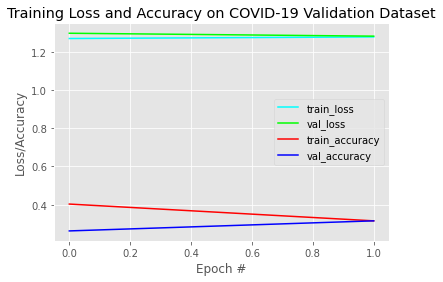

In [60]:
testX_v = dataValidation
testY_v = labelsValidation

print("Evaluating the trained model ...")
predIdxs_v = saved_model.predict(testX_v, batch_size=BS)

predIdxs_v = np.argmax(predIdxs_v, axis=1)

print(classification_report(testY_v.argmax(axis=1), predIdxs_v, target_names=label_encoder.classes_))

# calculate a basic confusion matrix
cm2 = confusion_matrix(testY_v.argmax(axis=1), predIdxs_v)
total2 = sum(sum(cm2))
acc2 = (cm2[0, 0] + cm2[1, 1] + cm2[2, 2]) / total2
sensitivity2 = cm2[0, 0] / (cm2[0, 0] + cm2[0, 1] + cm2[0, 2])
specificity2 = (cm2[1, 1] + cm2[1, 2] + cm2[2, 1] + cm2[2, 2]) / (cm2[1, 0] + cm2[1, 1] + cm2[1, 2] + cm2[2, 0] + cm2[2, 1] + cm2[2, 2])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm2)
print("acc: {:.4f}".format(acc2))
print("sensitivity: {:.4f}".format(sensitivity2))
print("specificity: {:.4f}".format(specificity2))

# plot the training loss and accuracy
N = EPOCHS 
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, N), H.history["loss"], label="train_loss",c ='aqua')
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss",c ='lime')
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_accuracy",c ='red')
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_accuracy",c ='b')

#plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
#plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
#plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Validation Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc='best')
#plt.savefig("./Validation_Data.png")
plt.savefig( '{}_{}_epochs_{}_BS_{}plot.png'.format(os.path.dirname(imagePathsValidation[0]).split('/')[1],EPOCHS,BS,dt))

[Text(0.5, 1.0, 'Validation Dataset (3,432 CXR images) Confusion Matrix')]

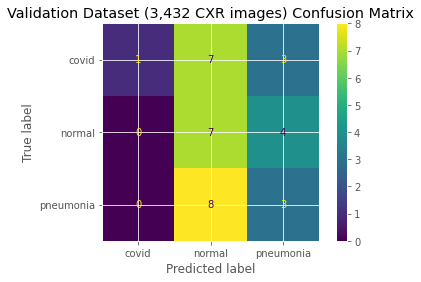

In [61]:
# confusion matrix of validation dataset from sklearn
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=c2)
disp3.plot()
disp3.ax_.set(
                title='Validation Dataset (3,432 CXR images) Confusion Matrix')#, 
                #xlabel='Predicted Fruits', 
                #ylabel='Actual Fruits')
#disp.show()

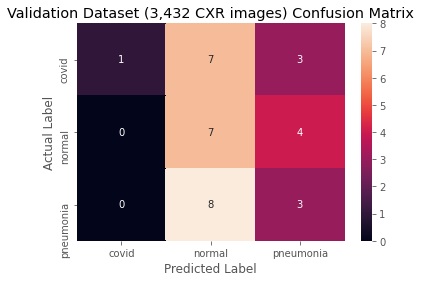

In [62]:
# confusion matrix of validation dataset from seaborn
## The Seaborn Library provides data visualization. In this example, it plots
## the Confusion Matrix
import seaborn as sns
## Call the heatmap() function from the Seaborn Library.
## annot=True annotates cells.
## fmt='g' disables scientific notation.
## The heatmap() function returns a Matplotlib Axes Object.
ax = sns.heatmap(cm2, annot=True, fmt='g');
## Modify the Axes Object directly to set various attributes such as the
## Title, X/Y Labels.
ax.set_title('Validation Dataset (3,432 CXR images) Confusion Matrix');
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label');
## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(c2)
ax.yaxis.set_ticklabels(c2)
## Finally call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

# Test Data

In [63]:
...
imagePathTest = "./test_set_2/"
...

Ellipsis

In [64]:
print(imagePathTest)

./test_set_2/


In [65]:
print("[INFO] loading untrained test images...")
#imagePathTest = "./validation"
imagePathsTest = list(paths.list_images(imagePathTest))
print(len(imagePathsTest))

[INFO] loading untrained test images...
52


In [66]:
dataTest = []
labelsTest = []

counter2 = 1
filesize_test=[]
# loop over the image paths
for imagePathTest in imagePathsTest:
    #print(counter2)
    # extract the class label from the filename
  #  labelTest = imagePathTest.split(os.path.sep)[-2]
  
	# load the image, swap color channels, and resize it to be a fixed
	# 256x256 pixels while ignoring aspect ratio
    imageTest = cv2.imread(imagePathTest)
    imageTest = cv2.cvtColor(imageTest, cv2.COLOR_BGR2RGB)
    height_test, width_test, channels_test = imageTest.shape
    filesize_test.append([height_test,width_test,channels_test,height_test*width_test*channels_test])
    imageTest = cv2.resize(imageTest, (imagesize, imagesize))

	# update the data and labels lists, respectively
    dataTest.append(imageTest)
   # labelsTest.append(labelTest)
    counter2=counter2+1
    
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 255]
dataTest = np.array(dataTest) / 255.0
#labelsTest = np.array(labelsTest)


# perform one-hot encoding on the labels
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#label_encoder2 = LabelEncoder()
#integer_encoded2 = label_encoder2.fit_transform(labelsTest)
#labelsTest = to_categorical(integer_encoded2)

#print(labelsTest)

In [67]:
df_test=pd.DataFrame(filesize_test,columns=["height_test","width_test","channels_test","size_test"])
df_test

,height_test,width_test,channels_test,size_test
0,1024,1024,3,3145728
1,1024,1024,3,3145728
2,1024,1024,3,3145728
3,1024,1024,3,3145728
4,512,512,3,786432
5,1024,1024,3,3145728
6,512,512,3,786432
7,1024,1024,3,3145728
8,512,512,3,786432
9,1024,1024,3,3145728


In [68]:
pd.DataFrame(df_test.value_counts()).to_csv('test_image_size.csv')

In [69]:
with open('test_image_size.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['height_test', 'width_test', 'channels_test', 'size_test', '0']
['1024', '1024', '3', '3145728', '33']
['512', '512', '3', '786432', '19']


In [70]:
print(' size of data: ',dataTest.size, '\n No of rows: ',len(dataTest),
      #'\n No of labels: ',len(labelsTest),
      '\n Type: ',type(dataTest),'\n','rows: ',len(dataTest),'\n','columns: ',len(dataTest[0]),'\n','total_length: ',len(dataTest)*len(dataTest[0]))

 size of data:  10223616 
 No of rows:  52 
 Type:  <class 'numpy.ndarray'> 
 rows:  52 
 columns:  256 
 total_length:  13312


In [71]:
print(len(dataTest),len(dataTest[0]),len(dataTest[0][0]),len(dataTest[0][0][0]))

52 256 256 3


In [72]:
predTest = saved_model.predict(dataTest, batch_size=BS)

print(predTest)

predClasses = predTest.argmax(axis=-1)
print(predClasses)
...

[[0.14316902 0.44541714 0.4114138 ]
 [0.18559557 0.6597773  0.15462708]
 [0.23942584 0.27276927 0.48780495]
 [0.09765343 0.68255776 0.2197888 ]
 [0.14615014 0.5006881  0.35316175]
 [0.07101811 0.815976   0.11300588]
 [0.1065264  0.48400912 0.40946448]
 [0.08640505 0.7482078  0.16538715]
 [0.21369219 0.49500278 0.29130495]
 [0.1673301  0.6064472  0.22622268]
 [0.2681508  0.2957839  0.43606535]
 [0.21537493 0.4050916  0.37953347]
 [0.20053284 0.3895245  0.4099427 ]
 [0.29842862 0.27959228 0.4219791 ]
 [0.1957568  0.43281668 0.37142655]
 [0.07274283 0.6792429  0.24801418]
 [0.12886645 0.66360193 0.20753165]
 [0.19556317 0.36703557 0.43740124]
 [0.20098354 0.40783224 0.39118427]
 [0.2480462  0.47085914 0.28109464]
 [0.09249993 0.4949829  0.4125172 ]
 [0.22297926 0.511849   0.2651718 ]
 [0.03646095 0.7281204  0.23541865]
 [0.1319152  0.66177636 0.20630848]
 [0.24990582 0.28984421 0.46024996]
 [0.03490426 0.84190226 0.12319345]
 [0.25199807 0.35911742 0.38888445]
 [0.1478031  0.616062   0.23

Ellipsis

In [73]:
import pandas
print(pd.DataFrame(predClasses).head())
print(predClasses.shape)
print(len(predClasses))
print(type(predClasses))
print()
print(pd.DataFrame(predClasses).value_counts())

   0
0  1
1  1
2  2
3  1
4  1
(52,)
52
<class 'numpy.ndarray'>

1    37
2    14
0     1
dtype: int64


#  Final File

In [74]:
import csv
import re
# name of csv file 
fn="submission2_"
filename = fn+dt+".csv"
# open the file in the write mode
f = open('/csv_file', 'w')
prediction_decoded = label_encoder.inverse_transform(predClasses)

#prediction_decoded2 = labels.inverse_transform(predClasses)
#print(prediction_decoded)
# writing to csv file 
with open(filename, 'w', newline='') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(['case', 'class'])     
    for i,j,k in zip(imagePathsTest,predClasses,prediction_decoded):
        print(re.sub(r'^./test_set/','',i),' :',j,': ',re.sub(r'^./newtrain/','',k))
        # writing the fields 
        #csvwriter.writerow((re.sub(r'^./test_set/','',i),re.sub(r'^./newtrain/','',k))) 
        csvwriter.writerow((re.sub(r'^./test_set/','',i),j)) 

./test_set_2/0001.jpg  : 1 :  ./validation_2/normal
./test_set_2/0002.jpg  : 1 :  ./validation_2/normal
./test_set_2/0003.jpg  : 2 :  ./validation_2/pneumonia
./test_set_2/0004.jpg  : 1 :  ./validation_2/normal
./test_set_2/0005.jpg  : 1 :  ./validation_2/normal
./test_set_2/0006.jpg  : 1 :  ./validation_2/normal
./test_set_2/0007.jpg  : 1 :  ./validation_2/normal
./test_set_2/0008.jpg  : 1 :  ./validation_2/normal
./test_set_2/0009.jpg  : 1 :  ./validation_2/normal
./test_set_2/0010.jpg  : 1 :  ./validation_2/normal
./test_set_2/0011.jpg  : 2 :  ./validation_2/pneumonia
./test_set_2/0012.jpg  : 1 :  ./validation_2/normal
./test_set_2/0013.jpg  : 2 :  ./validation_2/pneumonia
./test_set_2/0014.jpg  : 2 :  ./validation_2/pneumonia
./test_set_2/0015.jpg  : 1 :  ./validation_2/normal
./test_set_2/0016.jpg  : 1 :  ./validation_2/normal
./test_set_2/0017.jpg  : 1 :  ./validation_2/normal
./test_set_2/0018.jpg  : 2 :  ./validation_2/pneumonia
./test_set_2/0019.jpg  : 1 :  ./validation_2/norm

In [75]:
#df = pandas.read_csv('submission.csv')
df = pd.read_csv(filename)
df

,case,class
0,./test_set_2/0001.jpg,1
1,./test_set_2/0002.jpg,1
2,./test_set_2/0003.jpg,2
3,./test_set_2/0004.jpg,1
4,./test_set_2/0005.jpg,1
5,./test_set_2/0006.jpg,1
6,./test_set_2/0007.jpg,1
7,./test_set_2/0008.jpg,1
8,./test_set_2/0009.jpg,1
9,./test_set_2/0010.jpg,1


In [76]:
file2=fn+dt+".csv"
df = pd.read_csv(file2)
print(df)

                     case  class
0   ./test_set_2/0001.jpg      1
1   ./test_set_2/0002.jpg      1
2   ./test_set_2/0003.jpg      2
3   ./test_set_2/0004.jpg      1
4   ./test_set_2/0005.jpg      1
5   ./test_set_2/0006.jpg      1
6   ./test_set_2/0007.jpg      1
7   ./test_set_2/0008.jpg      1
8   ./test_set_2/0009.jpg      1
9   ./test_set_2/0010.jpg      1
10  ./test_set_2/0011.jpg      2
11  ./test_set_2/0012.jpg      1
12  ./test_set_2/0013.jpg      2
13  ./test_set_2/0014.jpg      2
14  ./test_set_2/0015.jpg      1
15  ./test_set_2/0016.jpg      1
16  ./test_set_2/0017.jpg      1
17  ./test_set_2/0018.jpg      2
18  ./test_set_2/0019.jpg      1
19  ./test_set_2/0020.jpg      1
20  ./test_set_2/0021.jpg      1
21  ./test_set_2/0022.jpg      1
22  ./test_set_2/0023.jpg      1
23  ./test_set_2/0024.jpg      1
24  ./test_set_2/0025.jpg      2
25  ./test_set_2/0026.jpg      1
26  ./test_set_2/0027.jpg      2
27  ./test_set_2/0028.jpg      1
28  ./test_set_2/0029.jpg      1
29  ./test

In [77]:
df.loc[0:]

,case,class
0,./test_set_2/0001.jpg,1
1,./test_set_2/0002.jpg,1
2,./test_set_2/0003.jpg,2
3,./test_set_2/0004.jpg,1
4,./test_set_2/0005.jpg,1
5,./test_set_2/0006.jpg,1
6,./test_set_2/0007.jpg,1
7,./test_set_2/0008.jpg,1
8,./test_set_2/0009.jpg,1
9,./test_set_2/0010.jpg,1


In [78]:
df['case'][0]

'./test_set_2/0001.jpg'

In [79]:
import os
os.path.basename(df['case'][0])

'0001.jpg'

In [80]:
df['case']=df['case'].map(lambda a:os.path.basename(a))
df

,case,class
0,0001.jpg,1
1,0002.jpg,1
2,0003.jpg,2
3,0004.jpg,1
4,0005.jpg,1
5,0006.jpg,1
6,0007.jpg,1
7,0008.jpg,1
8,0009.jpg,1
9,0010.jpg,1


In [81]:
final_file=fn+dt+".csv"
df.to_csv(final_file,index=False)

In [82]:
#import pandas
df2 = pandas.read_csv(final_file)
#df = pandas.read_csv(filename)
print(df2)

        case  class
0   0001.jpg      1
1   0002.jpg      1
2   0003.jpg      2
3   0004.jpg      1
4   0005.jpg      1
5   0006.jpg      1
6   0007.jpg      1
7   0008.jpg      1
8   0009.jpg      1
9   0010.jpg      1
10  0011.jpg      2
11  0012.jpg      1
12  0013.jpg      2
13  0014.jpg      2
14  0015.jpg      1
15  0016.jpg      1
16  0017.jpg      1
17  0018.jpg      2
18  0019.jpg      1
19  0020.jpg      1
20  0021.jpg      1
21  0022.jpg      1
22  0023.jpg      1
23  0024.jpg      1
24  0025.jpg      2
25  0026.jpg      1
26  0027.jpg      2
27  0028.jpg      1
28  0029.jpg      1
29  0030.jpg      2
30  0031.jpg      1
31  0032.jpg      2
32  0033.jpg      1
33  0034.jpg      1
34  0035.jpg      2
35  0036.jpg      1
36  0037.jpg      1
37  0038.jpg      1
38  0039.jpg      1
39  0040.jpg      2
40  0041.jpg      1
41  0042.jpg      0
42  0043.jpg      2
43  0044.jpg      1
44  0045.jpg      1
45  0046.jpg      1
46  0047.jpg      1
47  0048.jpg      1
48  0049.jpg      2


In [83]:
# label_encoder.inverse_transform(predClasses)
print(type(df2))
print()
print(pandas.DataFrame(df2.groupby('class').count()))
print()
print(pandas.DataFrame(df2['class'].value_counts()))

<class 'pandas.core.frame.DataFrame'>

       case
class      
0         1
1        37
2        14

   class
1     37
2     14
0      1


In [84]:
for i,j in zip(df2['class'].unique(),label_encoder.inverse_transform(df2['class'].unique())):
    print(i,' ',j)

1   ./validation_2/normal
2   ./validation_2/pneumonia
0   ./validation_2/covid


In [85]:
for i,j,k in zip(df['class'].unique(),df['class'].value_counts(),label_encoder.inverse_transform(df['class'].unique())):
    print(i,' ',j,' ',k)

1   37   ./validation_2/normal
2   14   ./validation_2/pneumonia
0   1   ./validation_2/covid


In [86]:
df.groupby('class')['class'].value_counts(),df['class'].unique(),label_encoder.inverse_transform(df['class'].unique())

(class  class
 0      0         1
 1      1        37
 2      2        14
 Name: class, dtype: int64,
 array([1, 2, 0], dtype=int64),
 array(['./validation_2/normal', './validation_2/pneumonia',
        './validation_2/covid'], dtype='<U24'))